# Working with Matplotlib

Previous IPython Notebook Tutorial: [02_instagram_analyze_Data_Cleaning](https://github.com/odubno/instagram_analyzer/blob/master/IPython_Notebook_Files/02_instagram_analyze_Data_Cleaning.ipynb)

Here, we'll be pulling all of our previous scripts together to extract and clean data from instagram in order to create matplotlib graphs.

In [1]:
import requests
import requests
from pandas.io.json import json_normalize
import pandas as pd
import datetime

def instagram_data(query):
    base_url = "https://api.instagram.com/v1"
    CLIENT_ID = '768fcf1f36c94eb08506bae0a9caffa3' #fake id
    url = '{0}/tags/{1}/media/recent?client_id={2}&count=30'.format(
        base_url, query, CLIENT_ID)
    r = requests.get(url)
    j = r.json()   
    results = []
    if 'data' in j: 
        data = j['data']
        df_instance = json_normalize(data)
        results.append(df_instance)        
    df = pd.DataFrame().append(results)    
    return df

def instagram_data_clean(instagram_data_df):
    df = instagram_data_df 
    df['created_time'] = [
    y.replace(y, datetime.datetime.fromtimestamp(int(str(y))).strftime(
    '%Y-%m-%d %H:%M:%S')) for y in df['created_time']]   
    cols = [
        'user.username',
        'caption.text',
        'tags',
        'comments.count',
        'likes.count',
        'filter',
        'type',
        'created_time',
        'user.full_name',
        'user.id',
        'link',
        'location.latitude',
        'location.longitude'
    ]    
    df_cols = df[cols]
    df_2 = df_cols.rename(columns=lambda x: x.replace('.',' ').title())  
    return df_2

In [15]:
instagram_data('nyc') # queries data for nyc

,attribution,caption.created_time,caption.from.full_name,caption.from.id,caption.from.profile_picture,caption.from.username,caption.id,caption.text,comments.count,comments.data,...,users_in_photo,videos.low_bandwidth.height,videos.low_bandwidth.url,videos.low_bandwidth.width,videos.low_resolution.height,videos.low_resolution.url,videos.low_resolution.width,videos.standard_resolution.height,videos.standard_resolution.url,videos.standard_resolution.width
0,None,1436472292,,30739713,https://instagramimages-a.akamaihd.net/profile...,kelvino514,1025526375547251236,NYC nightscape complete with waterfront view. ...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,1436472290,doBurkeStyle,1994030243,https://igcdn-photos-a-a.akamaihd.net/hphotos-...,lemestyleu,1025526365870609403,#BeInspired by #TheStylist\n#WorldwideStyle #R...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,1436472290,Gabriella Ponzi,1170930333,https://instagramimages-a.akamaihd.net/profile...,gabriellaponzi,1025526365988141364,#delacortetheater #centralpark #nyc #free #sha...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,1436472288,,20021004,https://igcdn-photos-b-a.akamaihd.net/hphotos-...,felly9999,1025526347466782621,4 gossip girls #Soho #n#NYC,0,[],...,"[{u'position': {u'y': 0.736, u'x': 0.749333333...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,1436472287,Wize Grazette,331189260,https://igcdn-photos-f-a.akamaihd.net/hphotos-...,therealwize,1025526334702654985,Excited to announce our next Entertainment Ind...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,1436472285,,36488581,https://igcdn-photos-e-a.akamaihd.net/hphotos-...,precious_soul9,1025526324727905070,Fried calamari with chili sauce and sticky swe...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,1436472283,Layla Hazlewood,1602311573,https://igcdn-photos-c-a.akamaihd.net/hphotos-...,laylahazlewood,1025526305247501254,@patrickhazlewood attends @Su2c benefit featur...,0,[],...,"[{u'position': {u'y': 0.615625, u'x': 0.401562...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,None,1436472282,Raevynna Victoria El Messaoudi,1663611038,https://igcdn-photos-b-a.akamaihd.net/hphotos-...,_.raevynna._.420._,1025526296841567434,The city that never sleeps 💖 #NYC #Newyork #n...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,None,1436472282,Terrance Wallace BiggTee,29669676,https://igcdn-photos-e-a.akamaihd.net/hphotos-...,big_tee25,1025526295536670332,By @3gp_kas via @RepostWhiz app:\nBy @djnaim v...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,None,1436472281,Alexandra Maruri,349893072,https://igcdn-photos-c-a.akamaihd.net/hphotos-...,bronxtours,1025526289637836579,A classic beauty in the neighborhood... #bronx...,0,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_2 = instagram_data_clean(instagram_data('nyc'))

In [9]:
# New imports to work with
import matplotlib.pyplot as plt

%matplotlib inline

We could now pull data from Instagram, select the fields we want to work with, clean the fields and output graphs. 

See one graph below using matplotlib.

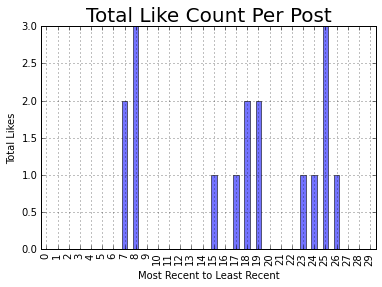

In [23]:
df_2['Likes Count'].plot(kind='bar', alpha=.55)
plt.title("Total Like Count Per Post", fontsize=20)
plt.xlabel('Most Recent to Least Recent')
plt.ylabel('Total Likes')

The graph above indexes at 0. That is the most recent post for the hashtag 'nyc' that was posted. The y-axis is responsible for how many likes each photos gets. 